In [2]:
using PyPlot
using LinearAlgebra

In [3]:
function affine_scaling(c,A,b, x0; beta = 0.5, epsilon = 1e-9, max_iter = 1000)
    
    x1_traj = []
    x2_traj = []
    
    x = x0
    
    for i in 1:max_iter
        push!(x1_traj, x[1])
        push!(x2_traj, x[2])
        
        X = Diagonal(x)
        p = inv(A*X^2*A')*A*X^2*c
        r = c-A'*p
        
        if minimum(r) >= 0 && dot(x,r) < epsilon
            break
        end
        
        x = x - beta* X^2*r/norm(X*r)
    end
   
    
    return x1_traj,x2_traj

end

affine_scaling (generic function with 1 method)

In [10]:

#=

=#

c=[-3,-2, 0, 0 ]
A=[
2 1 1 0 ;
1 2 0 1
]

b=[6 ,6]

x1 = 2.5
x2 = 0.1
x0 = [x1,x2, 6-2*x1-1*x2,6-1*x1-2*x2]


4-element Vector{Float64}:
 2.5
 0.1
 0.9
 3.3

In [5]:
function primal_path_following(c,A,b, x0; mu=0.9, alpha=0.9, epsilon = 1e-9, max_iter = 1000)
    x1_traj = []
    x2_traj = []
    
    x = x0
    e = ones(length(x),1)
    n = length(x)
    m = length(b)
    
    for i = 1:max_iter
        push!(x1_traj, x[1])
        push!(x2_traj, x[2])
        
        X = Diagonal(x)
        mu = alpha * mu
        
        LHS = [mu*inv(X)^2      -A'      ;
                A             zeros(m,m)  ]
        
        
        RHS = [mu*inv(X)*e - c ;
             zeros(m,1)]
        sol = LHS \ RHS
        
        d = sol[1:n]
        p = sol[n+1:end]
        x = x+d
        s = c -A'*p
        
        if dot(s,x) < epsilon
            break
        end
    end

    return x1_traj, x2_traj
    
end

primal_path_following (generic function with 1 method)

In [6]:
using LinearAlgebra

function primal_path_following(c,A,b,x0;
            mu=0.9, alpha=0.9, epsilon=1e-9, max_iter=1000)
  # Preparing variables for the trajectories
  x1_traj = []
  x2_traj = []

  # Initialization
  x = x0
  e = ones(length(x),1)
  n = length(x)
  m = length(b)

  for i=1:max_iter
    # Recording the trajectories of x1 and x2
    push!(x1_traj, x[1])
    push!(x2_traj, x[2])

    # Computing
    X = Diagonal(x)
    mu = alpha * mu

    # Solving the linear system
    LHS = [ mu*inv(X)^2       -A'     ;
               A          zeros(m,m)  ]
    RHS = [ mu*inv(X)*e - c ;
            zeros(m,1) ]
    sol = LHS \ RHS

    # Update
    d = sol[1:n]
    p = sol[n+1:end]
    x = x + d
    s = c - A'*p

    # Optimality check
    if dot(s,x) < epsilon
      break
    end
  end

  return x1_traj, x2_traj
end

primal_path_following (generic function with 1 method)

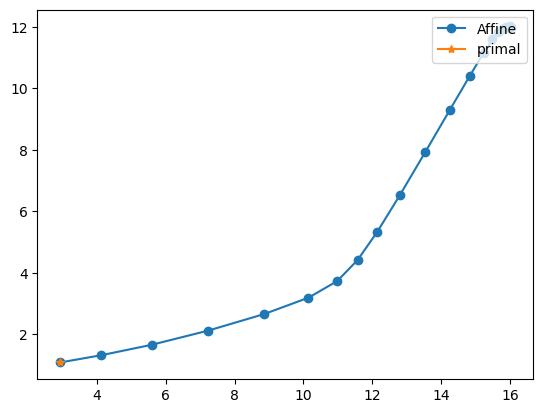

PyObject <matplotlib.legend.Legend object at 0x0000021724777F70>

In [7]:
#=

=#

c=[-8, -5, 0, 0, 0, 0 ]
A=[
2 4 1 0 0 0;
1 -3  0 1 0 0;
2 -1  0 0 1 0;
-1 4  0 0 0 1
]

b=[80, 4, 20, 40 ]

x1 = 2.93
x2 = 1.08
x0 = [x1,x2,80-(4*x2+2*x1),4-(-3*x2+1*x1),
    20-(-1*x2+2*x1), 40-(4*x2-1*x1)]

x1_traj_a,x2_traj_a = affine_scaling(c,A,b, x0)

x1_traj_p,x2_traj_p = primal_path_following(c,A,b, x0)
fig = figure()
plot(x1_traj_a,x2_traj_a,"o-", label = "Affine")

plot(x1_traj_p,x2_traj_p,"*-", label = "primal")
legend(loc = "upper right")


In [8]:
#=

for j in 0.1:0.1:10
    x1 =  j
        print(x1)
    for i  in 0.1:0.1:10

        x2 =  i
        print(x2)
        x1_traj_p,x2_traj_p = primal_path_following(c,A,b, x0)
        print(x1_traj_p,x2_traj_p)
        println("           ")
        print(plot(x1_traj_p,x2_traj_p,"*-", label = "primal"))
    end
end

=#

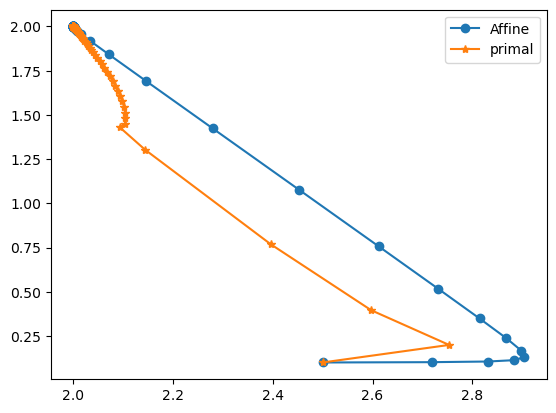

PyObject <matplotlib.legend.Legend object at 0x0000021731E6D930>

In [11]:
x1= 2.93
x2 = 1.08

x1_traj_a,x2_traj_a = affine_scaling(c,A,b, x0)

x1_traj_p,x2_traj_p = primal_path_following(c,A,b, x0)
fig = figure()
plot(x1_traj_a,x2_traj_a,"o-", label = "Affine")

plot(x1_traj_p,x2_traj_p,"*-", label = "primal")
legend(loc = "upper right")
